#ANISHA SINGH

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as preprocessing
from sklearn.impute import SimpleImputer

In [42]:
# read th dataset
data = pd.read_csv(r"/content/Projectdata .xlsx.csv")
data

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,06-01-2022,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,7/23/2022,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,6/23/2022,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,3/17/2022,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,12/21/2022,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14213,Sale,12018099994,Specialisation39,Department1,6/19/2022,3,0,61.436,145.200,0.0,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
14214,Sale,12018047025,Specialisation4,Department1,2/24/2022,2,0,64.448,119.692,0.0,Form1,PIPERACILLIN 1GM + TAZOBACTAM 125MG,INJECTIONS,ANTI-INFECTIVES
14215,Sale,12018017139,Specialisation1,Department1,6/27/2022,4,0,74.944,642.040,0.0,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
14216,Sale,12018044140,Specialisation20,Department1,7/30/2022,1,0,111.680,181.000,0.0,Form3,MEROPENEM 1GM INJ,INJECTIONS,ANTI-INFECTIVES


In [44]:
data.dtypes #used for see the datatype of all table columns

Typeofsales        object
Patient_ID          int64
Specialisation     object
Dept               object
Dateofbill         object
Quantity            int64
ReturnQuantity      int64
Final_Cost        float64
Final_Sales       float64
RtnMRP            float64
Formulation        object
DrugName           object
SubCat             object
SubCat1            object
dtype: object

In [45]:
## Data Cleaning & Organizing; ##

#DUPLICATE
data.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
14213    False
14214    False
14215    False
14216    False
14217    False
Length: 14218, dtype: bool

In [46]:
print(data.duplicated().sum())

26


In [47]:
duplicate = data.duplicated() #Used to see Duplicate values in data set.
duplicate

0        False
1        False
2        False
3        False
4        False
         ...  
14213    False
14214    False
14215    False
14216    False
14217    False
Length: 14218, dtype: bool

In [48]:
#Finding Duplicate values in whole data set.
sum(duplicate) # (it shows the sum of the duplicated value)

duplicate = data.duplicated(keep ='last')
duplicate

0        False
1        False
2        False
3        False
4        False
         ...  
14213    False
14214    False
14215    False
14216    False
14217    False
Length: 14218, dtype: bool

In [49]:
data2 = data.drop_duplicates() #Delete the duplicate values
data2
sum(duplicate)

26

In [50]:
#Used to find null values in dataset.
data.isnull().sum().sum() #the null value present in whole data set


5681

In [51]:
#Used to find null values in dataset.
data2.isnull().sum() #the null value present in whole data set


Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        650
DrugName          1659
SubCat            1659
SubCat1           1682
dtype: int64

In [52]:
#Used to find null values in dataset.
data2.isnull().sum().sum() #the null value present in whole data set


5650

In [53]:
import pandas as pd

mode_value = data2['Formulation'].mode()[0]
data2['Formulation'].fillna(mode_value, inplace=True)

<ipython-input-53-7854146f8734>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Formulation'].fillna(mode_value, inplace=True)


In [54]:
data2.isnull().sum()

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation          0
DrugName          1659
SubCat            1659
SubCat1           1682
dtype: int64

In [55]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to impute
mode_value = data2['DrugName'].mode()[0]
data2['DrugName'].fillna(mode_value, inplace=True)

<ipython-input-55-1bf1849c1475>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['DrugName'].fillna(mode_value, inplace=True)


In [56]:
data2.isnull().sum()

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation          0
DrugName             0
SubCat            1659
SubCat1           1682
dtype: int64

In [57]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to impute
mode_value = data2['SubCat'].mode()[0]
data2['SubCat'].fillna(mode_value, inplace=True)

<ipython-input-57-3ff896185eb3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SubCat'].fillna(mode_value, inplace=True)


In [58]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to impute
mode_value = data2['SubCat1'].mode()[0]
data2['SubCat1'].fillna(mode_value, inplace=True)

<ipython-input-58-f7df153db619>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SubCat1'].fillna(mode_value, inplace=True)


In [59]:
data2.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

In [60]:
data2.isnull().sum().sum()

0

In [61]:
#imputer using mean
data2.Quantity.isna().sum()
mean_imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
data2["Quantity"] = pd.DataFrame(mean_imputer.fit_transform(data2[['Quantity']]))




<ipython-input-61-6ad839a1e1d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Quantity"] = pd.DataFrame(mean_imputer.fit_transform(data2[['Quantity']]))


In [62]:
data2['Quantity'].isna().sum()

25

In [63]:
data2.Quantity.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
14213     True
14214     True
14215     True
14216     True
14217     True
Name: Quantity, Length: 14192, dtype: bool

In [64]:
data2['Quantity'].fillna(method='ffill', inplace=True)


<ipython-input-64-7a20aed68a2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Quantity'].fillna(method='ffill', inplace=True)


In [65]:
print(data2)

      Typeofsales   Patient_ID    Specialisation         Dept  Dateofbill  \
0            Sale  12018098765   Specialisation6  Department1  06-01-2022   
1            Sale  12018103897   Specialisation7  Department1   7/23/2022   
2            Sale  12018101123   Specialisation2  Department3   6/23/2022   
3            Sale  12018079281  Specialisation40  Department1   3/17/2022   
4            Sale  12018117928   Specialisation5  Department1  12/21/2022   
...           ...          ...               ...          ...         ...   
14213        Sale  12018099994  Specialisation39  Department1   6/19/2022   
14214        Sale  12018047025   Specialisation4  Department1   2/24/2022   
14215        Sale  12018017139   Specialisation1  Department1   6/27/2022   
14216        Sale  12018044140  Specialisation20  Department1   7/30/2022   
14217        Sale  12018116820  Specialisation26  Department1  10/24/2022   

       Quantity  ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulatio

# FINDING OUTLIERS

In [66]:
IQR = data['Quantity'].quantile(0.75) - data2['Quantity'].quantile(0.25)
lower_limit = data2['Quantity'].quantile(0.25) - (IQR * 1.5)
upper_limit = data2['Quantity'].quantile(0.75) + (IQR * 1.5)

In [67]:
upper_limit

3.5

In [68]:
lower_limit

-0.5

In [69]:
IQR

1.0

In [70]:
from feature_engine.outliers import Winsorizer
winsor_iqr = Winsorizer(capping_method = 'iqr',
                        # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails
                          fold = 1.5,
                          variables = ['Quantity'])

df_s = winsor_iqr.fit_transform(data2[['Quantity']])

<Axes: ylabel='Quantity'>

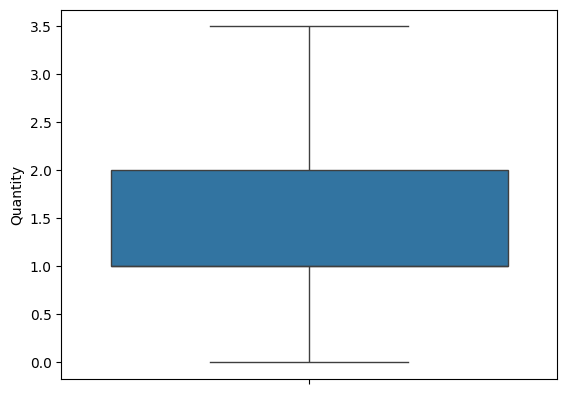

In [71]:
sns.boxplot(df_s.Quantity)

<Axes: ylabel='Final_Cost'>

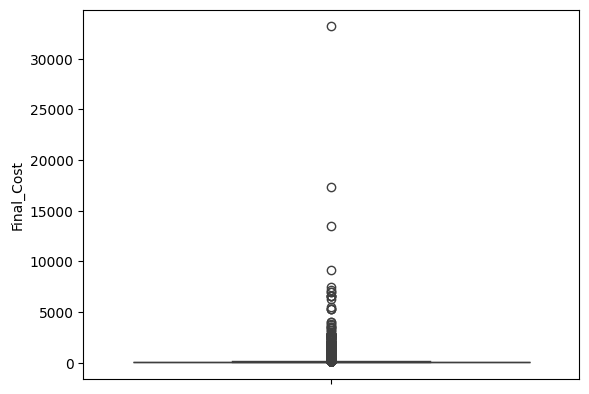

In [72]:
sns.boxplot(data2.Final_Cost)

In [73]:
IQR = data2['Final_Cost'].quantile(0.75) - data2['Final_Cost'].quantile(0.25)
lower_limit = data2['Final_Cost'].quantile(0.25) - (IQR * 1.5)
upper_limit = data2['Final_Cost'].quantile(0.75) + (IQR * 1.5)
IQR

32.872

In [74]:
lower_limit

-4.380000000000003

In [75]:
upper_limit

127.108

In [76]:
from feature_engine.outliers import Winsorizer
winsor_iqr = Winsorizer(capping_method = 'iqr',
                        # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails
                          fold = 1.5,
                          variables = ['Final_Cost'])

df_s = winsor_iqr.fit_transform(data2[['Final_Cost']])

<Axes: ylabel='Final_Cost'>

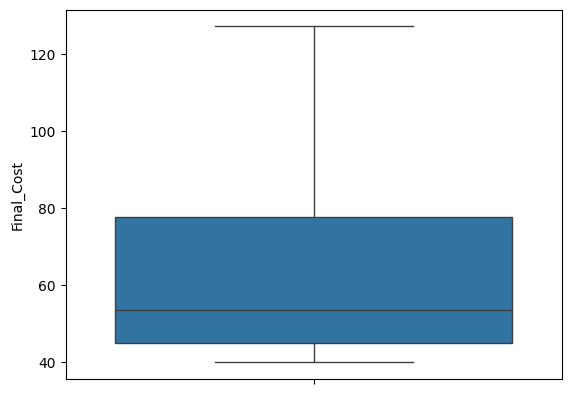

In [77]:
sns.boxplot(df_s.Final_Cost)

<Axes: ylabel='Final_Sales'>

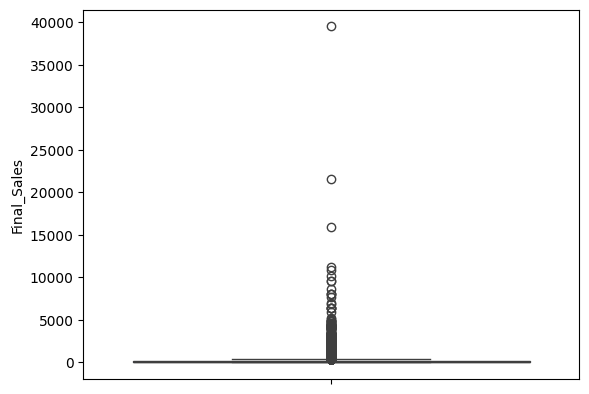

In [78]:
sns.boxplot(data2.Final_Sales)

In [79]:
IQR = data2['Final_Sales'].quantile(0.75) - data2['Final_Sales'].quantile(0.25)
lower_limit = data2['Final_Sales'].quantile(0.25) - (IQR * 1.5)
upper_limit = data2['Final_Sales'].quantile(0.75) + (IQR * 1.5)
IQR

133.155

In [80]:
lower_limit

-151.88750000000002

In [81]:
upper_limit

380.7325

In [82]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                        # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails
                          fold = 1.5,
                          variables = ['Final_Sales'])

df_s = winsor_iqr.fit_transform(data2[['Final_Sales']])

<Axes: ylabel='Final_Sales'>

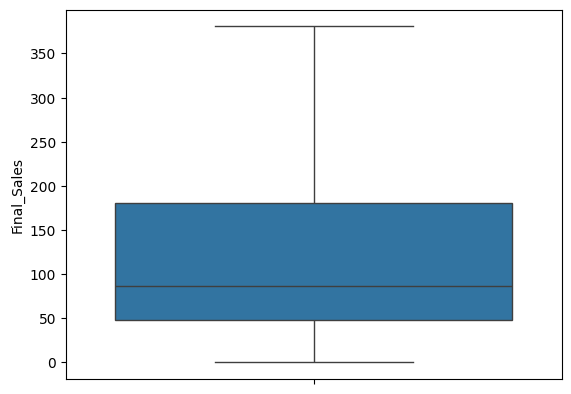

In [83]:
sns.boxplot(df_s.Final_Sales)

In [84]:
data2

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,06-01-2022,1.0,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,7/23/2022,1.0,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,6/23/2022,1.0,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,3/17/2022,2.0,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,12/21/2022,1.0,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14213,Sale,12018099994,Specialisation39,Department1,6/19/2022,3.0,0,61.436,145.200,0.0,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
14214,Sale,12018047025,Specialisation4,Department1,2/24/2022,3.0,0,64.448,119.692,0.0,Form1,PIPERACILLIN 1GM + TAZOBACTAM 125MG,INJECTIONS,ANTI-INFECTIVES
14215,Sale,12018017139,Specialisation1,Department1,6/27/2022,3.0,0,74.944,642.040,0.0,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
14216,Sale,12018044140,Specialisation20,Department1,7/30/2022,3.0,0,111.680,181.000,0.0,Form3,MEROPENEM 1GM INJ,INJECTIONS,ANTI-INFECTIVES


In [85]:
data2.columns # column names
data2.shape

(14192, 14)

In [86]:
import pandas as pd

# Assuming 'df' is your DataFrame with a date column
# Make sure the date column is in datetime format
data2['Dateofbill'] = pd.to_datetime(data2['Dateofbill'])

# Set the 'Date' column as the index (if not already done)
data2.set_index('Dateofbill', inplace=True)

# Use weekly resampling and apply a aggregation function (e.g., mean, sum, etc.)
weekly_data = data2.resample('W').sum()


<ipython-input-86-ffc3ac8527d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Dateofbill'] = pd.to_datetime(data2['Dateofbill'])
<ipython-input-86-ffc3ac8527d4>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data = data2.resample('W').sum()


In [87]:
weekly_data

,Patient_ID,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP
Dateofbill,,,,,,
2022-01-02,648975866319,185.0,4,10998.058,19322.512,584.692
2022-01-09,2896354768882,550.0,76,36201.560,63476.782,9175.030
2022-01-16,2511776678757,476.0,86,16530.166,27980.136,8388.456
2022-01-23,2547830658891,476.0,45,22114.732,51275.610,3615.626
2022-01-30,3076626395290,513.0,37,30985.778,60239.426,3953.766
2022-02-06,3244879899719,607.0,154,34796.398,67425.274,14164.406
2022-02-13,2788192079790,551.0,57,36381.740,61484.544,7278.814
2022-02-20,2668011858944,520.0,71,28685.930,56805.588,6111.954
2022-02-27,3136717672292,739.0,43,33543.812,57815.982,8829.596


In [88]:
data2.dtypes

Typeofsales        object
Patient_ID          int64
Specialisation     object
Dept               object
Quantity          float64
ReturnQuantity      int64
Final_Cost        float64
Final_Sales       float64
RtnMRP            float64
Formulation        object
DrugName           object
SubCat             object
SubCat1            object
dtype: object

#EDA

# First moment Business Decission¶


In [89]:
weekly_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2022-01-02 to 2023-01-01
Freq: W-SUN
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      53 non-null     int64  
 1   Quantity        53 non-null     float64
 2   ReturnQuantity  53 non-null     int64  
 3   Final_Cost      53 non-null     float64
 4   Final_Sales     53 non-null     float64
 5   RtnMRP          53 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.9 KB


In [90]:
weekly_data.Quantity.mean()       #mean


599.0188679245283

# Insights
Quantity Sold:The average quantity of products sold per week is approximately 599.


In [91]:
weekly_data.Final_Cost.mean()

33381.79735849056

# Insights
Final Cost:The average final cost is approximately 33,381.80 units of the currency,
    suggesting the total cost associated with the products sold.


In [92]:
weekly_data.Final_Sales.mean()

62588.48898113209

# Insights
The average final sales value is approximately 62,588.49 units of the currency, indicating the total sales revenue generated.


In [93]:
data2.DrugName.mode()

0    SODIUM CHLORIDE IVF 100ML
Name: DrugName, dtype: object

# Insights
The most frequently occurring drug name is "SODIUM CHLORIDE IVF 100ML," indicating its popularity or common usage.


In [94]:
data2.SubCat.mode()

0    INJECTIONS
Name: SubCat, dtype: object

# Insights
The most frequent subcategory is "INJECTIONS," suggesting a high frequency of injection-related products.


In [95]:
data2.SubCat1.mode()

0    INTRAVENOUS & OTHER STERILE SOLUTIONS
Name: SubCat1, dtype: object

# Insights
The most frequent subcategory 1 is "INTRAVENOUS & OTHER STERILE SOLUTIONS," indicating a prevalence of sterile solutions in the data.

# Second moment Business Decission

In [96]:
weekly_data.Quantity.var() # variance
weekly_data.Quantity.std() # standard deviation
range = max(weekly_data.Quantity) - min(weekly_data.Quantity) # range
range

694.0

In [97]:
weekly_data.Quantity.var() # variance

13514.018867924528

In [98]:
weekly_data.Quantity.std() # standard deviation

116.24981233500779

# Insights
Quantity Sold:

Variance: Approximately 13,514.02
Standard Deviation: Approximately 116.25
Range: 694.0


In [99]:
weekly_data.Final_Cost.var()
weekly_data.Final_Cost.std()
range = max(weekly_data.Final_Cost) - min(weekly_data.Final_Cost)
range

55186.71399999999

In [100]:
weekly_data.Final_Cost.var()

95786683.17886856

In [101]:
weekly_data.Final_Cost.std()

9787.067138773931

# Insights
Final Cost:

Variance: Approximately 95,786,683.18
Standard Deviation: Approximately 9,787.07
Range: 55,186.71


In [102]:
weekly_data.Final_Sales.var()
weekly_data.Final_Sales.std()
range = max(weekly_data.Final_Sales) - min(weekly_data.Final_Sales)
range

90219.734

In [103]:
weekly_data.Final_Sales.var()

242605457.9357198

In [104]:
weekly_data.Final_Sales.std()

15575.79718459764

# Insights
Final Sales:

Variance: Approximately 242,605,457.94
Standard Deviation: Approximately 15,575.80
Range: 90,219.73

# Third moment Business Decission

In [105]:
weekly_data.Quantity.skew()

-0.22434833670726287

In [106]:
weekly_data.Final_Cost.skew()

0.7901597508995204

In [107]:
weekly_data.Final_Sales.skew()

0.08827756229385621

# Insights

Quantity Sold: Slightly negatively skewed with heavier tails (leptokurtic).
Final Cost: Positively skewed with heavier tails (leptokurtic).
Final Sales: Nearly normal distribution with fewer extreme values.


# Fourth moment Business Decission

In [108]:
weekly_data.Quantity.kurt()

2.2639124453295785

In [109]:
weekly_data.Final_Cost.kurt()

2.0925017593031954

In [110]:
weekly_data.Final_Sales.kurt()

1.7552202466263753

##Inference
Quantity Sold: Heavier tails in the distribution.
Final Cost: Also has heavier tails.
Final Sales: Tails are closer to a typical distribution.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from feature_engine import transformation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from feature_engine.imputation import RandomSampleImputer
import scipy.stats as stats
import pylab

(array([[ 1.,  0., 20., 32.],
        [53.,  0.,  0.,  0.],
        [53.,  0.,  0.,  0.],
        [53.,  0.,  0.,  0.],
        [53.,  0.,  0.,  0.],
        [53.,  0.,  0.,  0.]]),
 array([4.00000000e+00, 1.05458840e+12, 2.10917679e+12, 3.16376519e+12,
        4.21835359e+12]),
 <a list of 6 BarContainer objects>)

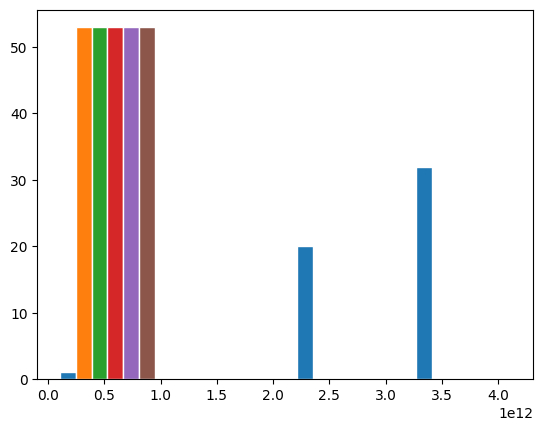

In [112]:
plt.hist(weekly_data,bins = 4, edgecolor = "white")

(array([ 1.,  0.,  0.,  1., 12., 16., 10.,  6.,  5.,  2.]),
 array([185. , 254.4, 323.8, 393.2, 462.6, 532. , 601.4, 670.8, 740.2,
        809.6, 879. ]),
 <BarContainer object of 10 artists>)

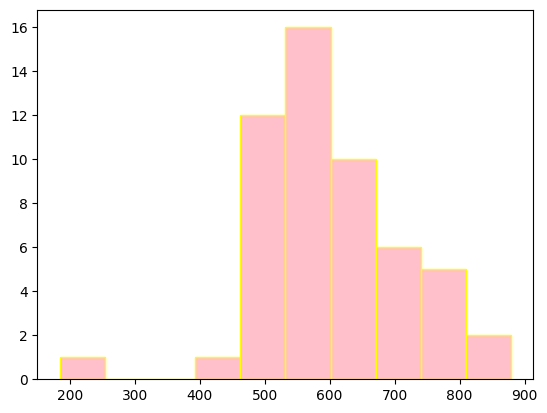

In [113]:
plt.hist(weekly_data.Quantity,bins = 10, color = "pink", edgecolor = "yellow")

(array([ 1.,  1.,  5.,  1.,  6., 13., 15.,  3.,  2.,  0.,  3.,  2.,  0.,
         0.,  1.]),
 array([10998.058     , 14677.17226667, 18356.28653333, 22035.4008    ,
        25714.51506667, 29393.62933333, 33072.7436    , 36751.85786667,
        40430.97213333, 44110.0864    , 47789.20066667, 51468.31493333,
        55147.4292    , 58826.54346667, 62505.65773333, 66184.772     ]),
 <BarContainer object of 15 artists>)

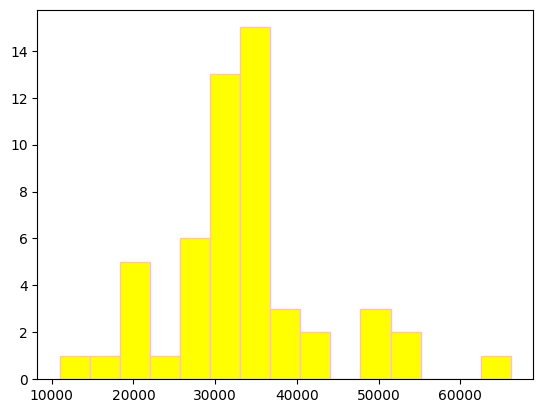

In [114]:
plt.hist(weekly_data.Final_Cost, bins = 15, color = "yellow", edgecolor = "pink")

(array([ 1.,  1.,  0.,  1.,  2.,  0.,  4.,  3., 10., 10.,  6.,  5.,  3.,
         2.,  2.,  1.,  0.,  1.,  0.,  1.]),
 array([ 19322.512 ,  23833.4987,  28344.4854,  32855.4721,  37366.4588,
         41877.4455,  46388.4322,  50899.4189,  55410.4056,  59921.3923,
         64432.379 ,  68943.3657,  73454.3524,  77965.3391,  82476.3258,
         86987.3125,  91498.2992,  96009.2859, 100520.2726, 105031.2593,
        109542.246 ]),
 <BarContainer object of 20 artists>)

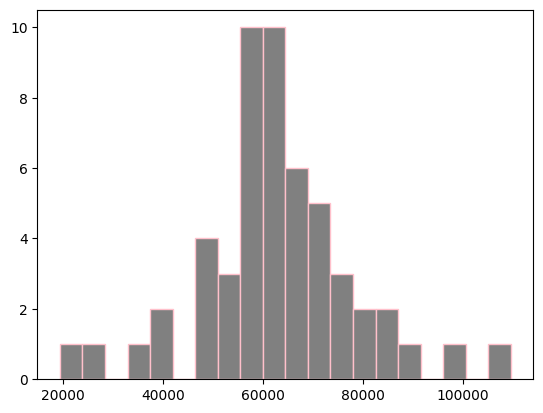

In [115]:
plt.hist(weekly_data.Final_Sales, bins = 20, color = "grey", edgecolor = "pink")

(array([1., 0., 0., 0., 1., 2., 3., 2., 4., 5., 5., 6., 4., 3., 4., 3., 0.,
        1., 2., 1., 0., 1., 1., 2., 2.]),
 array([  4.,  10.,  16.,  22.,  28.,  34.,  40.,  46.,  52.,  58.,  64.,
         70.,  76.,  82.,  88.,  94., 100., 106., 112., 118., 124., 130.,
        136., 142., 148., 154.]),
 <BarContainer object of 25 artists>)

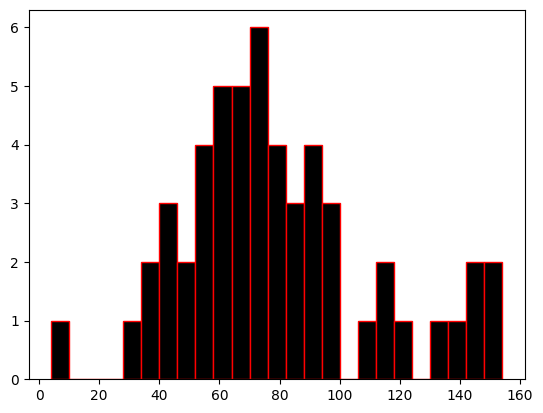

In [116]:
plt.hist(weekly_data.ReturnQuantity, bins = 25, color = "black", edgecolor = "red")


(array([ 2.,  2.,  7.,  9., 13., 13.,  2.,  3.,  1.,  0.,  0.,  0.,  1.]),
 array([  584.692     ,  2196.27276923,  3807.85353846,  5419.43430769,
         7031.01507692,  8642.59584615, 10254.17661538, 11865.75738462,
        13477.33815385, 15088.91892308, 16700.49969231, 18312.08046154,
        19923.66123077, 21535.242     ]),
 <BarContainer object of 13 artists>)

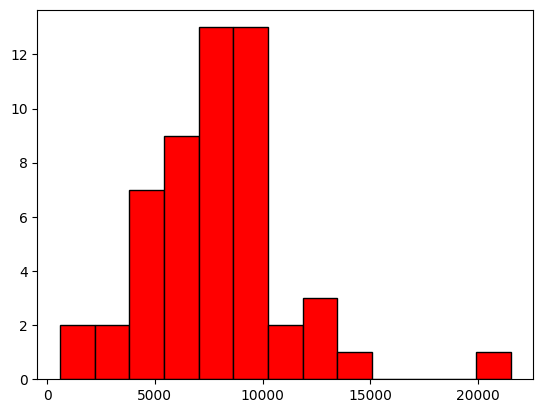

In [117]:
plt.hist(weekly_data.RtnMRP, bins = 13, color = "red", edgecolor = "black")

In [118]:
plt.show()

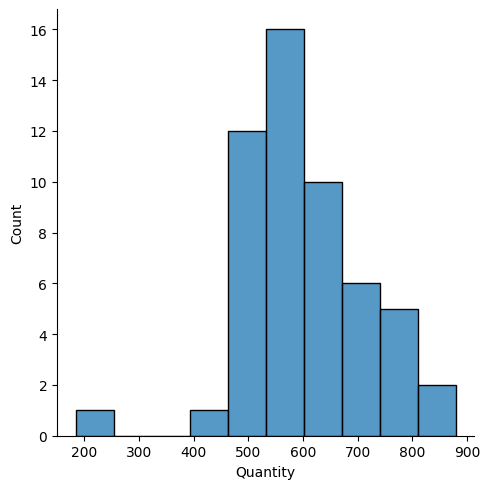

In [119]:
sns.displot(weekly_data.Quantity)

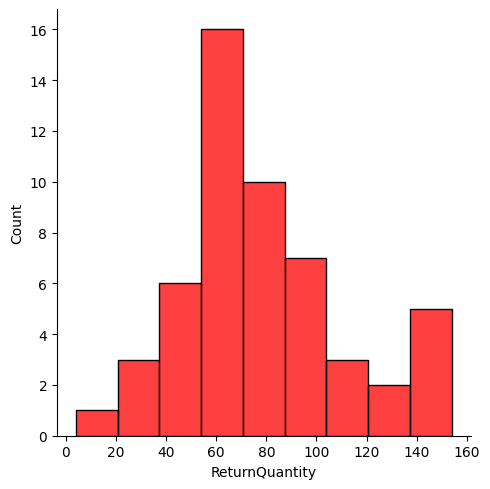

In [120]:
sns.displot(weekly_data.ReturnQuantity, color = "red")

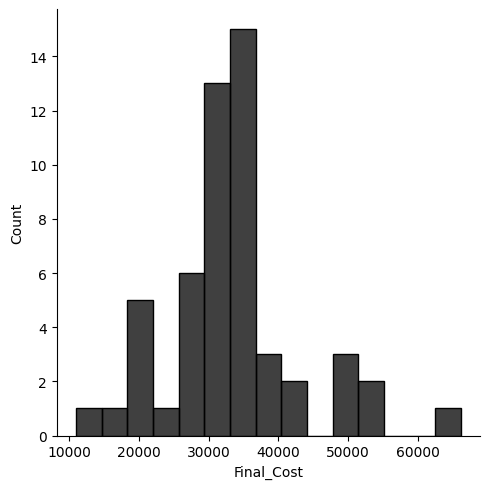

In [121]:
sns.displot(weekly_data.Final_Cost, color = "black")

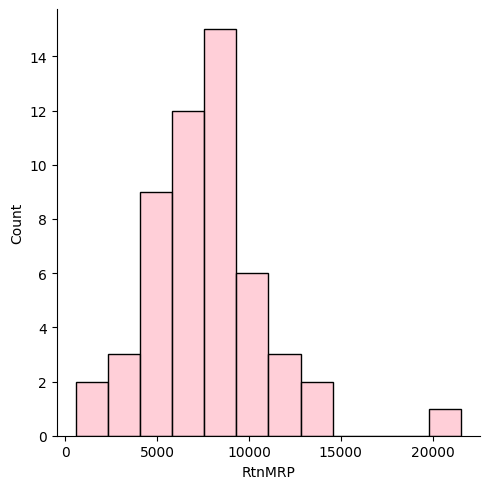

In [122]:
sns.displot(weekly_data.RtnMRP, color = "pink")

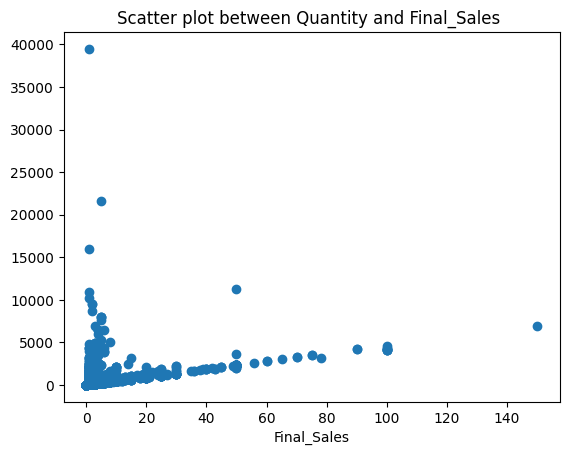

In [123]:
# creating a sctter plot between 'Actual_Shipment_Time' and 'Planned_Shipment_Time'
plt.scatter(data['Quantity'], data['Final_Sales'])
plt.xlabel('Quantity')
plt.xlabel('Final_Sales')
plt.title('Scatter plot between Quantity and Final_Sales ')
plt.show()

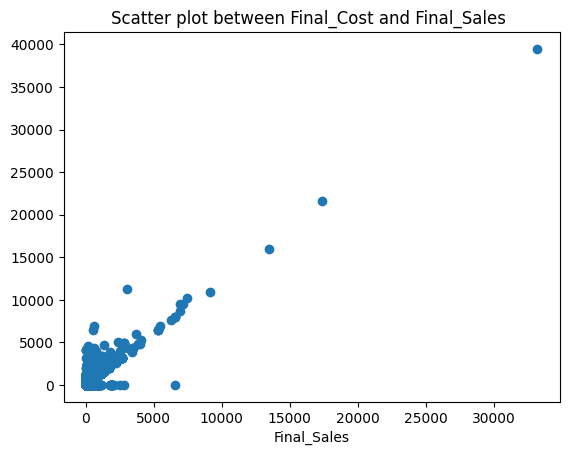

In [124]:
# creating a sctter plot between 'Actual_Shipment_Time' and 'Planned_Shipment_Time'
plt.scatter(data['Final_Cost'], data['Final_Sales'])
plt.xlabel('Final_Cost')
plt.xlabel('Final_Sales')
plt.title('Scatter plot between Final_Cost and Final_Sales ')
plt.show()

# Auto EDA

In [6]:
# sweetviz
pip install sweetviz
import sweetviz as sv
s = sv.analyze(data2)
s.show_html()

NameError: name 'data2' is not defined

In [ ]:
# sweetviz
pip install sweetviz
import sweetviz as sv
s = sv.analyze(data2)
s.show_html()

SyntaxError: invalid syntax (<ipython-input-2-dfab57a457c2>, line 1)

In [4]:
from autoviz.AutoViz_Class import AutoViz_Class

av = AutoViz_Class()
%matplotlib inline
# a= av.AutoViz(r"fedex.csv", chart_format = 'html')
a = av.AutoViz(r"C:\Users\anish\Desktop\project_research\Projectdata .xlsx.csv")

ModuleNotFoundError: No module named 'autoviz'

In [ ]:
import dtale
data = pd.read_csv(r"C:\Users\anish\Desktop\project_research\Projectdata .xlsx.csv")
d = dtale.show(data)
d.open_browser()


# SQL

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

In [ ]:
db_connection = {
    'user': 'root',#USER
    'password': 'Zabcd', #PASSWORD
    'host': 'localhost', #LOCALHOST
    'database': 'miniproject'
}


In [ ]:
data2.to_sql('data2', con = engine, if_exists = 'replace', chunksize = None, index= False)

In [ ]:
sql = "SELECT * FROM data2;" # wright query of sql and save into variable
Drug = pd.read_sql_query(sql, engine) # connecting query with Engine and reading the results by using "pd.read_sql_query"
Drug

# POWER BI

In [ ]:
#To save the file for Power_BI
data2.to_csv('preprocessed_data2.csv',index=False)